In [1]:
import os

# Get current working directory
current_dir = os.getcwd()

print("Current directory:", current_dir)

Current directory: C:\Users\Mhdella\iHelm\Cinderella_Clustering


In [2]:
tempo_res='1min'  ; dw=0.005

###########
import shap
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
from sklearn.linear_model import LogisticRegression
from scipy.stats import ttest_ind

In [3]:
# Output_folder='Cinderella_cluster_by_distance_v1'
# Output_folder='Cinderella_cluster_by_distance_v2'
# Output_folder='Cinderella_cluster_by_distance_v3'
Output_folder='Cinderella_cluster_by_distance_v4'


In [4]:
# folder_path = r'C:/Users/'+user_name+'/OneDrive - Högskolan i Halmstad/iHelm/Buro_Clustering/Outputs/'+Eff_SOG_Subfolder


folder_path = r''+Output_folder
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

In [5]:
# df = pd.read_pickle('Data/Cinderella_Weatheres_1min_data.pkl')
df = pd.read_pickle('Data/Cinderella_Weatheres_1S_data.pkl')

df_all=df

df.shape

(243688, 70)

In [6]:
# st=stop
df

,engine_rpm,engine_fuel_rate,latitude,longitude,latitude_can0,longitude_can0,heading_magnetic,heading_true,course_over_ground_true,speed_over_ground,...,wavedirect,Temp_2m,Temp_surf,WaveSwell_ht,Swell_ht,Snow_depth,Snow_fall,Press_surf,Precip,Bathymetry
date,,,,,,,,,,,,,,,,,,,,,
2022-07-01 08:54:52,1326.416667,82.000000,59.401617,18.355397,59.401590,18.355414,167.395300,172.890000,171.795700,0.448467,...,151.301651,293.959625,293.131531,1.387444,0.619551,0.0,-5.820766e-11,101286.906250,0.002678,30.0
2022-07-01 08:54:53,1340.500000,101.333333,59.401609,18.355403,59.401579,18.355416,167.395300,172.890000,171.795700,0.589003,...,151.303497,293.959625,293.131531,1.387459,0.619582,0.0,-5.820766e-11,101286.914062,0.002678,30.0
2022-07-01 08:54:54,1379.500000,114.500000,59.401597,18.355410,59.401562,18.355425,167.395300,172.890000,171.795700,0.742814,...,151.305344,293.959625,293.131531,1.387473,0.619613,0.0,-5.820766e-11,101286.914062,0.002678,30.0
2022-07-01 08:54:55,1423.166667,120.000000,59.401582,18.355416,59.401548,18.355434,167.395300,172.890000,171.795700,0.900456,...,151.307190,293.959625,293.131531,1.387488,0.619644,0.0,-5.820766e-11,101286.921875,0.002677,30.0
2022-07-01 08:54:56,1423.083333,122.000000,59.401569,18.355422,59.401535,18.355439,167.395300,172.890000,171.795700,1.056645,...,151.309036,293.959625,293.131531,1.387503,0.619675,0.0,-5.820766e-11,101286.921875,0.002677,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-06 15:22:27,1079.875000,28.375000,59.401974,18.355802,59.401973,18.355803,252.354950,257.849650,127.806862,0.087500,...,206.433884,282.306488,282.461243,2.048510,0.515422,0.0,-5.820766e-11,100333.257812,0.000399,30.0
2022-11-06 15:22:28,1081.500000,35.666667,59.401974,18.355803,59.401972,18.355803,253.009533,258.504233,173.826817,0.208333,...,206.434097,282.306549,282.461243,2.048510,0.515455,0.0,-5.820766e-11,100333.257812,0.000399,30.0
2022-11-06 15:22:29,1081.416667,39.333333,59.401973,18.355803,59.401971,18.355803,253.374350,258.869033,169.127583,0.208333,...,206.434296,282.306580,282.461243,2.048509,0.515487,0.0,-5.820766e-11,100333.257812,0.000399,30.0


#### Modify Course and wind direction measurments

In [7]:
# df.columns

In [8]:
df['courseOverGroundTrue']= df.course_over_ground_true
df['windDirectionTrue']= df.wind_direction_true

df[['courseOverGroundTrue','windDirectionTrue']].describe()

,courseOverGroundTrue,windDirectionTrue
count,243688.000000,243688.000000
mean,178.397720,176.315674
std,91.753745,96.435665
min,0.048700,0.000000
25%,99.722948,101.645594
50%,171.795700,174.893483
75%,270.592938,261.916912
max,359.892000,359.892000


In [9]:
dforig=df
df

,engine_rpm,engine_fuel_rate,latitude,longitude,latitude_can0,longitude_can0,heading_magnetic,heading_true,course_over_ground_true,speed_over_ground,...,Temp_surf,WaveSwell_ht,Swell_ht,Snow_depth,Snow_fall,Press_surf,Precip,Bathymetry,courseOverGroundTrue,windDirectionTrue
date,,,,,,,,,,,,,,,,,,,,,
2022-07-01 08:54:52,1326.416667,82.000000,59.401617,18.355397,59.401590,18.355414,167.395300,172.890000,171.795700,0.448467,...,293.131531,1.387444,0.619551,0.0,-5.820766e-11,101286.906250,0.002678,30.0,171.795700,160.576217
2022-07-01 08:54:53,1340.500000,101.333333,59.401609,18.355403,59.401579,18.355416,167.395300,172.890000,171.795700,0.589003,...,293.131531,1.387459,0.619582,0.0,-5.820766e-11,101286.914062,0.002678,30.0,171.795700,156.996200
2022-07-01 08:54:54,1379.500000,114.500000,59.401597,18.355410,59.401562,18.355425,167.395300,172.890000,171.795700,0.742814,...,293.131531,1.387473,0.619613,0.0,-5.820766e-11,101286.914062,0.002678,30.0,171.795700,153.420925
2022-07-01 08:54:55,1423.166667,120.000000,59.401582,18.355416,59.401548,18.355434,167.395300,172.890000,171.795700,0.900456,...,293.131531,1.387488,0.619644,0.0,-5.820766e-11,101286.921875,0.002677,30.0,171.795700,149.662333
2022-07-01 08:54:56,1423.083333,122.000000,59.401569,18.355422,59.401535,18.355439,167.395300,172.890000,171.795700,1.056645,...,293.131531,1.387503,0.619675,0.0,-5.820766e-11,101286.921875,0.002677,30.0,171.795700,151.495800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-06 15:22:27,1079.875000,28.375000,59.401974,18.355802,59.401973,18.355803,252.354950,257.849650,127.806862,0.087500,...,282.461243,2.048510,0.515422,0.0,-5.820766e-11,100333.257812,0.000399,30.0,127.806862,210.930100
2022-11-06 15:22:28,1081.500000,35.666667,59.401974,18.355803,59.401972,18.355803,253.009533,258.504233,173.826817,0.208333,...,282.461243,2.048510,0.515455,0.0,-5.820766e-11,100333.257812,0.000399,30.0,173.826817,206.375550
2022-11-06 15:22:29,1081.416667,39.333333,59.401973,18.355803,59.401971,18.355803,253.374350,258.869033,169.127583,0.208333,...,282.461243,2.048509,0.515487,0.0,-5.820766e-11,100333.257812,0.000399,30.0,169.127583,207.490900


In [10]:
# st=stop

### Postprocessing data

In [11]:
df=dforig
df.shape

(243688, 72)

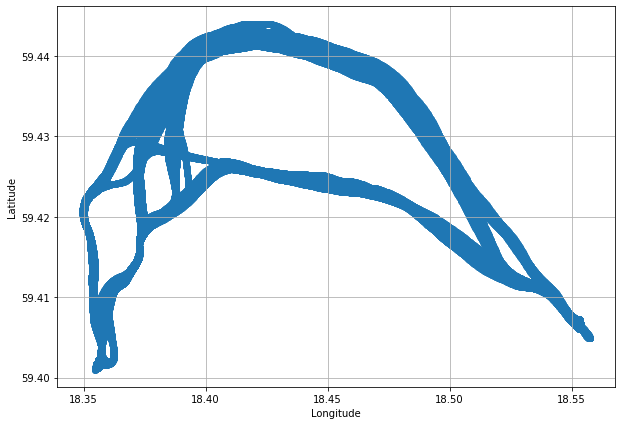

In [12]:
# Create a scatter plot of latitude and longitude to visualize the ferry's path
fig = plt.figure(figsize=(10,7))
plt.scatter(dforig['longitude'], dforig['latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

plt.savefig(Output_folder+'/Scatter_dforig_lat_lon_paths.png', dpi=500)  

plt.show()

In [13]:
# st=stop

In [14]:
df.direction.unique()
print(df['direction'].value_counts().sum())
df['direction'].value_counts()

243688


South                 104308
North_Middle_Upper     66628
North_West_Upper       26867
North_East_Lower       26311
North_Middle_Lower     11407
South_West              4408
North_West_Lower        3759
Name: direction, dtype: int64

### Merging and changing names of some paths (minority paths with slight difference)

In [15]:
df['direction'] = df['direction'].replace('North_West_Upper', 'North_West')
df['direction'] = df['direction'].replace('North_West_Lower', 'North_West')

df['direction'] = df['direction'].replace('North_East_Lower', 'North_East')
df['direction'] = df['direction'].replace('North_Middle_Upper', 'North_Middle')
df['direction'] = df['direction'].replace('North_Middle_Lower', 'North_Middle')

# Check the new unique values
df.direction.unique()
print(df['direction'].value_counts().sum())
df['direction'].value_counts()

243688


South           104308
North_Middle     78035
North_West       30626
North_East       26311
South_West        4408
Name: direction, dtype: int64

In [16]:
dforig1=df
dforig2=df
dforig3=df

In [17]:
# df = df[['latitude', 'longitude', 'speedOverGround', 'courseOverGroundTrue',
#               'distanceFromDock', 'distanceToNextDock', 'distanceToPreviousDock', 
#               'accumDistLeg', 'accumFuelLeg', 'accumTimeLeg', 'EngineFuelRate',
#               'windSpeedOverGround', 'windDirectionTrue',  'windSpeed','windDirection', 
#               'waveheight', 'wavedirect','currentSpeed', 'currentDirection',
#               'windSpeed_sg', 'windDirection_sg', 'Temp_2m', 'Temp_surf',
#        'Snow_depth', 'Snow_fall', 'Press_surf', 'Precip',
#          'iceCover', 'swellHeight', 'secondarySwellHeight','waterTemperature',
#          'direction']]


df['pathSelection']=df.direction

In [18]:
df.shape

(243688, 73)

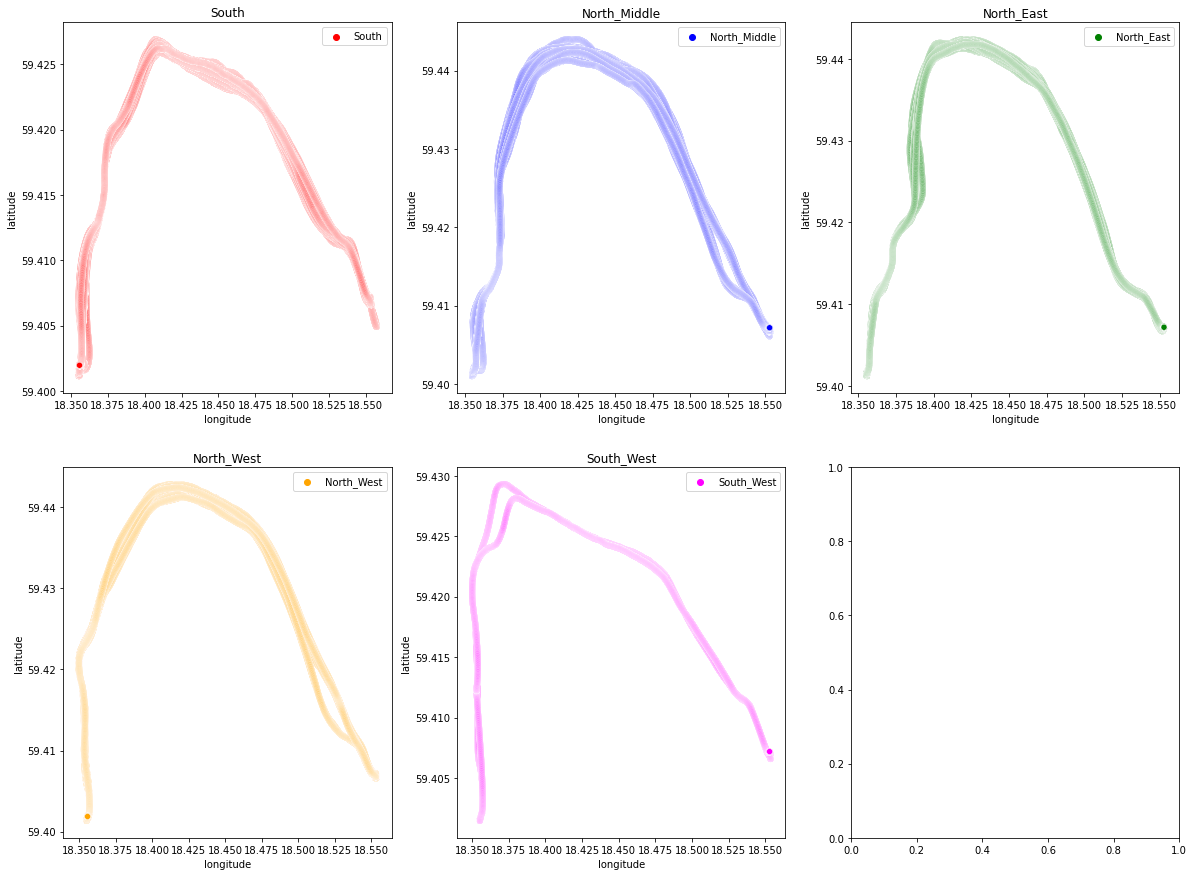

In [19]:
import seaborn as sns

# Visualize the distribution of latitude and longitude for both paths
import matplotlib.ticker as ticker
fig_scatter_actual_paths, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))
sns.scatterplot(x='longitude', y='latitude', hue='direction', data=df[df['direction']=='South'], ax=axes[0,0],  palette=['red'])
sns.scatterplot(x='longitude', y='latitude', hue='direction', data=df[df['direction']=='North_Middle'], ax=axes[0,1],  palette=['blue'])
sns.scatterplot(x='longitude', y='latitude', hue='direction', data=df[df['direction']=='North_East'], ax=axes[0,2],  palette=['green'])
sns.scatterplot(x='longitude', y='latitude', hue='direction', data=df[df['direction']=='North_West'], ax=axes[1,0],  palette=['orange'])
sns.scatterplot(x='longitude', y='latitude', hue='direction', data=df[df['direction']=='South_West'], ax=axes[1,1],  palette=['magenta'])

# # Set number format for axis ticks
# for ax in axes:
#     ax.ticklabel_format(useOffset=False, style='plain')


axes[0,0].set_title('South')
axes[0,1].set_title('North_Middle')
axes[0,2].set_title('North_East')
axes[1,0].set_title('North_West')
axes[1,1].set_title('South_West')

axes[0,0].legend(title='')
axes[0,1].legend(title='')
axes[0,2].legend(title='')
axes[1,0].legend(title='')
axes[1,1].legend(title='')

fig_scatter_actual_paths.savefig(Output_folder+'/ScatterPlot_acutal_5paths.png')  

plt.show()

In [20]:
# dforig[(dforig.RT_id==1308) & (dforig.Direct_RT==0)].longitude
df.direction.unique()

array(['North_East', 'North_Middle', 'South', 'North_West', 'South_West'],
      dtype=object)

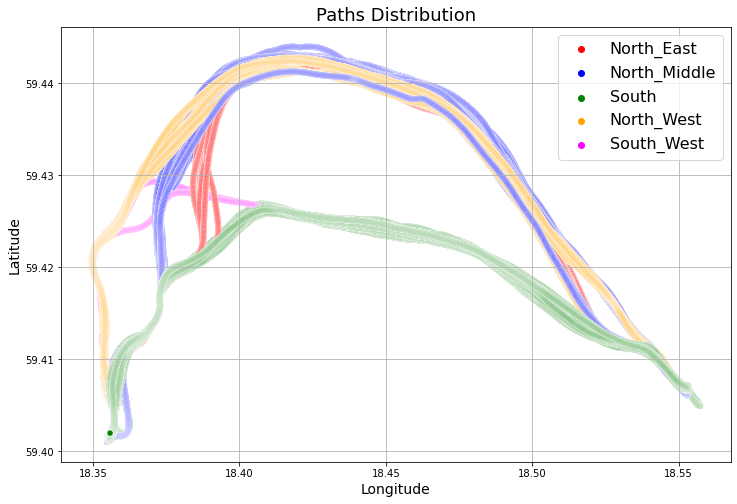

In [21]:
import seaborn as sns

# Visualize the distribution of latitude and longitude for all path classes in a single plot
fig = plt.figure(figsize=(12, 8))

# Use the 'hue' parameter to specify the path selection class
sns.scatterplot(x='longitude', y='latitude', hue='direction', 
                data=df, legend='full', palette=['red', 'blue', 'green', 'orange','magenta'])


# Set title
plt.title('Paths Distribution', fontsize=18)

plt.legend(fontsize=16)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
plt.grid()

plt.savefig(Output_folder+'/ScatterPlot_Colorful_paths.png')  

plt.show()

In [22]:
df.direction.unique()

array(['North_East', 'North_Middle', 'South', 'North_West', 'South_West'],
      dtype=object)

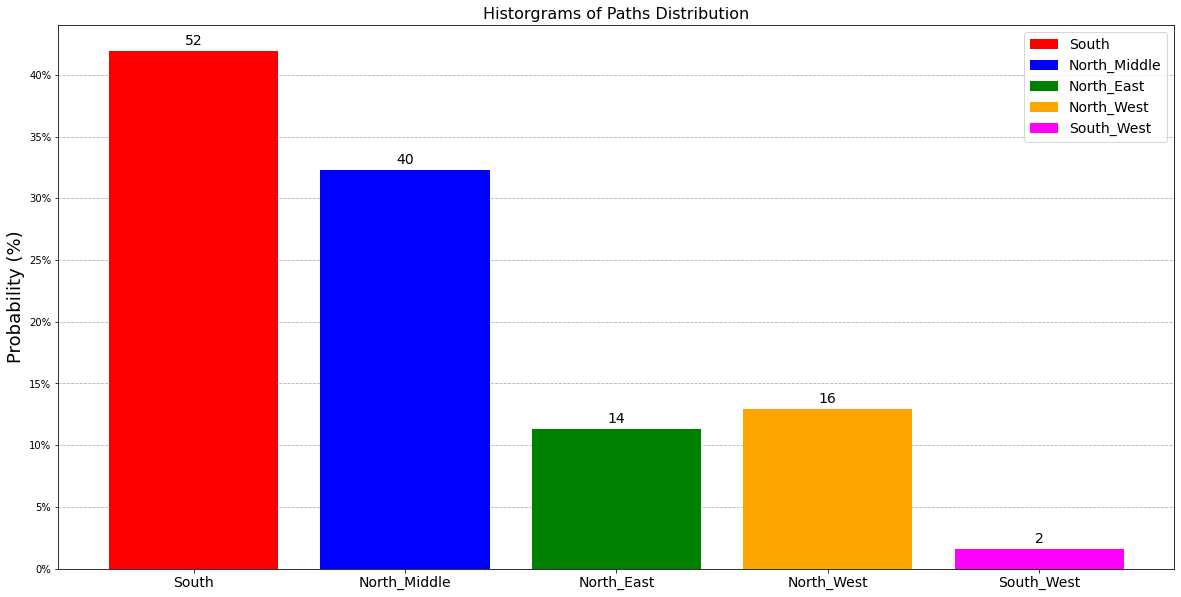

In [23]:
# train_df.groupby(['RT_id']).mean()
rt_class=[]
rt_class=df.groupby('RT_id')['direction'].first()

# Calculate the probability distribution of each path class
prob_dist = rt_class.value_counts(normalize=True)
counts = rt_class.value_counts()

# Set up the plot
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlabel('Path Class', fontsize=14)
ax.set_ylabel('Probability (%)', fontsize=14)


# Set the colors and labels for each path class
colors=['red', 'blue', 'green', 'orange', 'magenta']

labels = ['South', 'North_Middle', 'North_East', 'North_West', 'South_West']

# Plot the probability distribution for each path class
for i in range(len(labels)):
    ax.bar(labels[i], prob_dist[labels[i]], color=colors[i], label=labels[i], zorder=3)
    ax.text(labels[i], prob_dist[labels[i]]+0.005, str(counts[labels[i]]), ha='center', fontsize=14)

# Set the y-axis labels as percentages
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.tick_params(axis='x', labelsize=14)


# Set the title and legend
ax.set_title('Historgrams of Paths Distribution', fontsize=16)
plt.legend(fontsize=16)
plt.xlabel('',fontsize=18)
plt.ylabel('Probability (%)',fontsize=18)

ax.legend(fontsize=14)
ax.grid(axis='y', linestyle='--', zorder=0)


plt.savefig(Output_folder+'/Hist_5paths.png', dpi=500)  

plt.show()


### Distance to the nearest point 
To get a distance matrix for between the routes

In [24]:
# dforig.columns
dforig=dforig1
dforig.direction.unique()
print(dforig.direction.value_counts())
print(dforig.shape)

South           104308
North_Middle     78035
North_West       30626
North_East       26311
South_West        4408
Name: direction, dtype: int64
(243688, 73)


In [25]:
dforig[dforig.direction=='South'].RT_id.unique()
dforig[dforig.direction=='North_Middle'].RT_id.unique()
dforig[dforig.direction=='North_East'].RT_id.unique()
dforig[dforig.direction=='North_West'].RT_id.unique()
dforig[dforig.direction=='South_West'].RT_id.unique()


array([22., 75.])

#### Example of train_df small to fast the calculation of distance matrix

In [26]:
# rts_list=[7, 1, 0, 22, 27, 10, 103, 3, 9, 2, 75, 5, 33, 13, 12, 6, 24, 39,19, 84, 105]; rts_list_fg=0


rts_list=list(dforig2.RT_id.unique()); rts_list_fg=2


# train_df=train_df[train_df.RT_id.isin(rts_list)]
train_df=dforig2[dforig2.RT_id.isin(rts_list)]

# train_df.RT_id.unique()

In [27]:
train_df.shape

(243688, 73)

In [28]:
# train_df.groupby(['RT_id']).mean()
df_class_disp=[]
df_class_disp=train_df.groupby('RT_id')['direction'].first()
df_class_disp = df_class_disp.reindex(rts_list)
df_class_disp

RT_id
0.0        North_East
1.0      North_Middle
2.0        North_East
3.0      North_Middle
4.0        North_East
             ...     
119.0           South
120.0           South
121.0           South
122.0           South
123.0           South
Name: direction, Length: 124, dtype: object

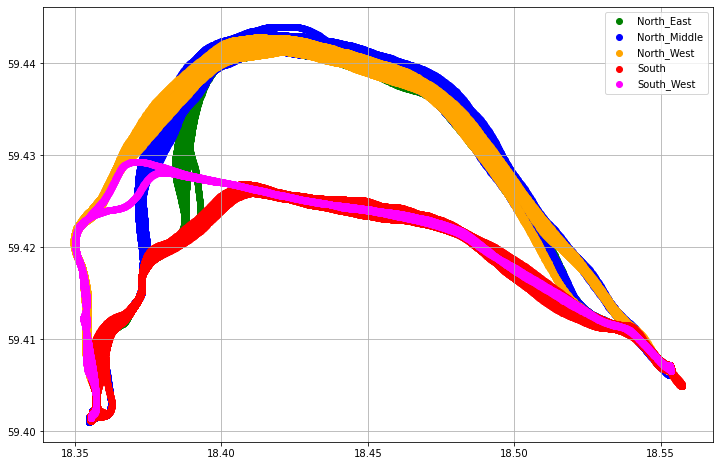

In [29]:
# filter dataframe to include only rows with RT_id values in rts_list
path_plt = train_df[train_df.RT_id.isin(rts_list)]
# path_plt = train_df[train_df.RT_id.isin([3, 9, 1692, 1697, 1700])]

# plot the data
colors={'South':'red', 'North_Middle':'blue', 'North_East':'green', 
        'North_West':'orange','South_West':'magenta'}


# fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(12, 8))

for direction, group in path_plt.groupby('direction'):
    ax.scatter(group['longitude'], group['latitude'], c=colors[direction], label=direction)
    ax.grid()
ax.legend()


plt.savefig(Output_folder+'/scatterplot_5paths_case_'+str(rts_list_fg)+'.png', dpi=500)  

plt.show()

In [30]:
###To find the 'RT_id's that have more than one unique value for the 'direction' column
counts = train_df.groupby('RT_id')['direction'].nunique()
multiple_classes = counts[counts > 1].index.tolist()
print(multiple_classes) ###So there is no path that has more than 1 class

counts = dforig3.groupby('RT_id')['direction'].nunique()
multiple_classes = counts[counts > 1].index.tolist()
print(multiple_classes) ###For the entire data, there is no path that has more than 1 class

[]
[]


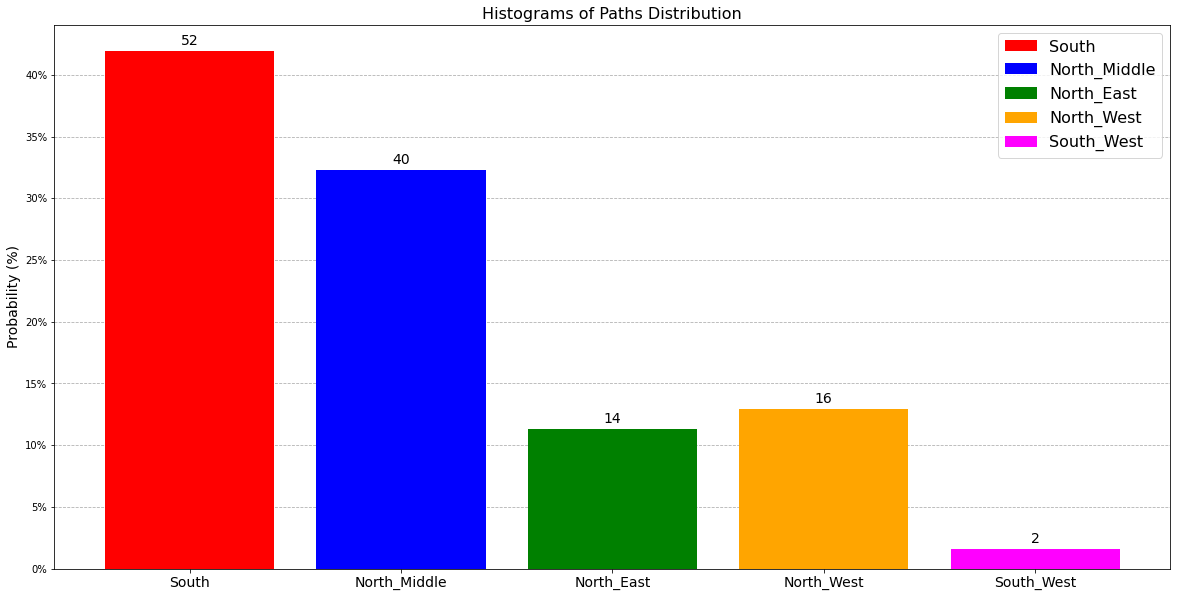

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# train_df.groupby(['RT_id']).mean()
rt_class=[]
# rt_class=train_df.groupby('RT_id')['direction'].first()
rt_class = train_df.groupby('RT_id')['direction'].apply(lambda x: x.mode()[0])
# rt_class = rt_class.reindex(rts_list)
# Calculate the probability distribution of each path class
prob_dist = rt_class.value_counts(normalize=True)
counts = rt_class.value_counts()

# Set up the plot
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlabel('Path Class', fontsize=14)
ax.set_ylabel('Probability (%)', fontsize=14)


# Set the colors and labels for each path class
colors=['red', 'blue', 'green', 'orange', 'magenta']

labels = ['South', 'North_Middle', 'North_East', 'North_West', 'South_West']

# Plot the probability distribution for each path class
for i in range(len(labels)):
    ax.bar(labels[i], prob_dist[labels[i]], color=colors[i], label=labels[i], zorder=3)
    ax.text(labels[i], prob_dist[labels[i]]+0.005, str(counts[labels[i]]), ha='center', fontsize=14)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.tick_params(axis='x', labelsize=14)

# Set the title and legend
ax.set_title('Histograms of Paths Distribution', fontsize=16)
plt.legend(fontsize=16)
plt.xlabel('',fontsize=18)
ax.grid(axis='y', linestyle='--', zorder=0)

plt.savefig(Output_folder+'/Barplot_hists_5paths.png', dpi=500)  

plt.show()


In [32]:
train_df.shape

(243688, 73)

In [33]:
train_df[train_df.direction=='East_Canal']
train_df.groupby('RT_id')['direction'].apply(lambda x: x.mode()[0])

RT_id
0.0        North_East
1.0      North_Middle
2.0        North_East
3.0      North_Middle
4.0        North_East
             ...     
119.0           South
120.0           South
121.0           South
122.0           South
123.0           South
Name: direction, Length: 124, dtype: object

In [34]:
paths = []

rts_ex=rts_list
for pth in rts_ex:
    df_latlon=train_df[train_df.RT_id.isin([pth])]
    path = list(zip(df_latlon['latitude'], df_latlon['longitude']))
    paths.append(path)

len(paths)

124

#### Computing the distance matrix 

In [35]:
from scipy.spatial import KDTree
import numpy as np

# define a list of paths, each represented as a list of latitude and longitude coordinates
paths=paths

# convert the paths to numpy arrays
path_arrays = [np.array(path) for path in paths]

# compute the distance matrix between paths using KDTree
distances = np.zeros((len(paths), len(paths)))
for i, path1 in enumerate(paths):
    for j, path2 in enumerate(paths):
        if i != j:
            tree = KDTree(np.array(path2))
            dist, idx = tree.query(np.array(path1), k=1)
            distances[i,j] = dist.sum()


# print the distance matrix
distances.shape

(124, 124)

In [36]:
## Convert the distances_train array to a DataFrame
df_distance= pd.DataFrame(distances, index=df_class_disp, columns=df_class_disp)

# Rename the index and column names
df_distance.index.name = ''
df_distance.columns.name = ''

# Print the DataFrame
df_distance.round(4)


,North_East,North_Middle,North_East,North_Middle,North_East,North_Middle,North_Middle,South,North_Middle,South,...,South,South,South,South,South,South,South,South,South,South
,,,,,,,,,,,,,,,,,,,,,
North_East,0.0000,3.4235,1.2391,2.7371,0.7507,3.3733,3.7269,11.7282,3.0620,11.5081,...,11.7987,11.7374,11.8917,11.8027,11.8036,11.6523,11.5540,11.8052,11.6195,11.6193
North_Middle,3.3103,0.0000,4.1225,1.0304,3.6923,0.9850,0.7858,13.1285,0.8256,13.0228,...,12.8597,13.2732,12.7283,13.3524,12.8227,13.2100,13.0201,12.5565,12.9808,12.4667
North_East,1.0908,3.9560,0.0000,3.3101,0.5928,3.9098,4.2548,9.8341,3.6218,9.6078,...,9.8709,9.8211,9.9162,9.8846,9.8605,9.7799,9.6995,9.8100,9.6656,9.6080
North_Middle,2.5716,1.0285,3.4072,0.0000,2.9364,0.9662,1.0797,12.9743,0.7019,12.8371,...,12.8647,13.1128,12.8459,13.1983,12.7122,13.0322,12.8654,12.6361,12.8204,12.4581
North_East,0.6372,3.5177,0.5892,2.8683,0.0000,3.4883,3.8184,9.7614,3.1983,9.5954,...,9.8302,9.8111,9.8952,9.8837,9.8165,9.7465,9.6675,9.8025,9.6093,9.6290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
South,13.1039,16.1948,12.2816,15.6115,12.7158,15.8118,16.2195,0.4183,15.7479,0.3868,...,0.6366,0.4751,0.7211,0.5653,0.6523,0.0000,0.4311,0.7084,0.3847,0.7977
South,13.8283,17.1119,12.9560,16.5143,13.4009,16.7413,17.1524,0.5226,16.6633,0.5482,...,0.5717,0.5739,0.7080,0.7006,0.5480,0.4537,0.0000,0.7271,0.4904,0.6733
South,13.5060,16.2230,12.5268,15.7864,12.9788,15.8143,16.2671,0.6979,15.7597,0.7482,...,0.4721,0.8045,0.2952,0.8913,0.5201,0.8420,0.8342,0.0000,0.6592,0.3905


In [37]:
rts_list_fg

2

### K-Mean with distance matrix

In [38]:
from sklearn.cluster import KMeans

# Create a dictionary to map cluster labels to path class labels


if rts_list_fg==0:
    cluster_label_map = {
        0: 'North_West',
        1: 'South',
        2: 'North_East',
        3: 'North_Middle',
        4: 'South_West'}


if rts_list_fg==2:
    cluster_label_map = {
        0: 'North_West',
        1: 'South',
        2: 'North_East',
        3: 'North_Middle',
        4: 'South_West'}


# Cluster the path classes in train_df based on their distances
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(distances)

clusters_train= kmeans.predict(distances)
clusters_train

# Apply the mapping to the cluster labels
path_class_labels = [cluster_label_map[label] for label in clusters_train]


# path_class_labels


In [39]:
y_pred=np.array(path_class_labels)
y_test=df_class_disp.values
print({class_name: count for class_name, count in zip(*np.unique(y_test, return_counts=True))})
print({class_name: count for class_name, count in zip(*np.unique(y_pred, return_counts=True))})

{'North_East': 14, 'North_Middle': 40, 'North_West': 16, 'South': 52, 'South_West': 2}
{'North_East': 20, 'North_Middle': 34, 'North_West': 16, 'South': 52, 'South_West': 2}


In [40]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
# print(f'Confusion matrix:\n{conf_mat}')

df_conf_mat = pd.DataFrame(conf_mat, index=['North_East', 'North_Middle', 'North_West',
                                            'South', 'South_West'], ##Actual paths
                           columns=['North_East', 'North_Middle', 'North_West',
                                            'South', 'South_West']) ##Predicted paths
df_conf_mat


##### Note: Rows=Actual paths, Columns=Predicted paths

,North_East,North_Middle,North_West,South,South_West
North_East,14,0,0,0,0
North_Middle,6,34,0,0,0
North_West,0,0,16,0,0
South,0,0,0,52,0
South_West,0,0,0,0,2


In [41]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

  North_East       0.70      1.00      0.82        14
North_Middle       1.00      0.85      0.92        40
  North_West       1.00      1.00      1.00        16
       South       1.00      1.00      1.00        52
  South_West       1.00      1.00      1.00         2

    accuracy                           0.95       124
   macro avg       0.94      0.97      0.95       124
weighted avg       0.97      0.95      0.95       124



In [42]:
report = classification_report(y_test, y_pred, output_dict=True)

df_report = pd.DataFrame.from_dict(report).transpose().round(3)
df_report

,precision,recall,f1-score,support
North_East,0.700,1.000,0.824,14.000
North_Middle,1.000,0.850,0.919,40.000
North_West,1.000,1.000,1.000,16.000
South,1.000,1.000,1.000,52.000
South_West,1.000,1.000,1.000,2.000
accuracy,0.952,0.952,0.952,0.952
macro avg,0.940,0.970,0.948,124.000
weighted avg,0.966,0.952,0.954,124.000


In [43]:
train_df.shape

(243688, 73)

In [44]:
np.unique(labels)

array(['North_East', 'North_Middle', 'North_West', 'South', 'South_West'],
      dtype='<U12')

In [45]:
y_pred
y_test
# Find the indices of mismatched entries
mismatch_indices = np.where(y_pred != y_test)[0]

# Print the indices of mismatched entries
print(mismatch_indices.shape)
print("Indices of mismatched entries:")
print(mismatch_indices)

(6,)
Indices of mismatched entries:
[ 27  33  40  81 100 107]


In [46]:
# distances[mismatch_indices.tolist(),mismatch_indices.tolist()]

In [47]:
misclus_rts=df_class_disp.iloc[mismatch_indices.tolist()]
misclus_rts

RT_id
27.0     North_Middle
33.0     North_Middle
40.0     North_Middle
81.0     North_Middle
100.0    North_Middle
107.0    North_Middle
Name: direction, dtype: object

In [48]:
misclus_rts.index

Float64Index([27.0, 33.0, 40.0, 81.0, 100.0, 107.0], dtype='float64', name='RT_id')

In [49]:
# st=stop

### Plot clustering results from K-means

In [50]:
dforig.shape

(243688, 73)

In [51]:
from collections import Counter
print(len(rts_list))
print(y_test.shape)
print(y_pred.shape)
print(Counter(y_test))
print(Counter(y_pred))

124
(124,)
(124,)
Counter({'South': 52, 'North_Middle': 40, 'North_West': 16, 'North_East': 14, 'South_West': 2})
Counter({'South': 52, 'North_Middle': 34, 'North_East': 20, 'North_West': 16, 'South_West': 2})


In [52]:
# dforig2[['RT_id', 'direction', 'latitude', 'longitude']]

In [53]:
# Create a new DataFrame dforig2_result with the same structure as dforig2
dforig2_result = dforig2[['RT_id', 'latitude', 'longitude']].copy()

# Assign the cluster assignments to the 'direction' column of dforig2_result
for i, rt_id in enumerate(rts_list):
    idx = dforig2['RT_id'] == rt_id
    dforig2_result.loc[idx, 'direction'] = y_pred[i]

# Convert the 'direction' column to integer type
dforig2_result['direction'] = dforig2_result['direction']

# Verify the result
dforig2_result

,RT_id,latitude,longitude,direction
date,,,,
2022-07-01 08:54:52,0.0,59.401617,18.355397,North_East
2022-07-01 08:54:53,0.0,59.401609,18.355403,North_East
2022-07-01 08:54:54,0.0,59.401597,18.355410,North_East
2022-07-01 08:54:55,0.0,59.401582,18.355416,North_East
2022-07-01 08:54:56,0.0,59.401569,18.355422,North_East
...,...,...,...,...
2022-11-06 15:22:27,123.0,59.401974,18.355802,South
2022-11-06 15:22:28,123.0,59.401974,18.355803,South
2022-11-06 15:22:29,123.0,59.401973,18.355803,South


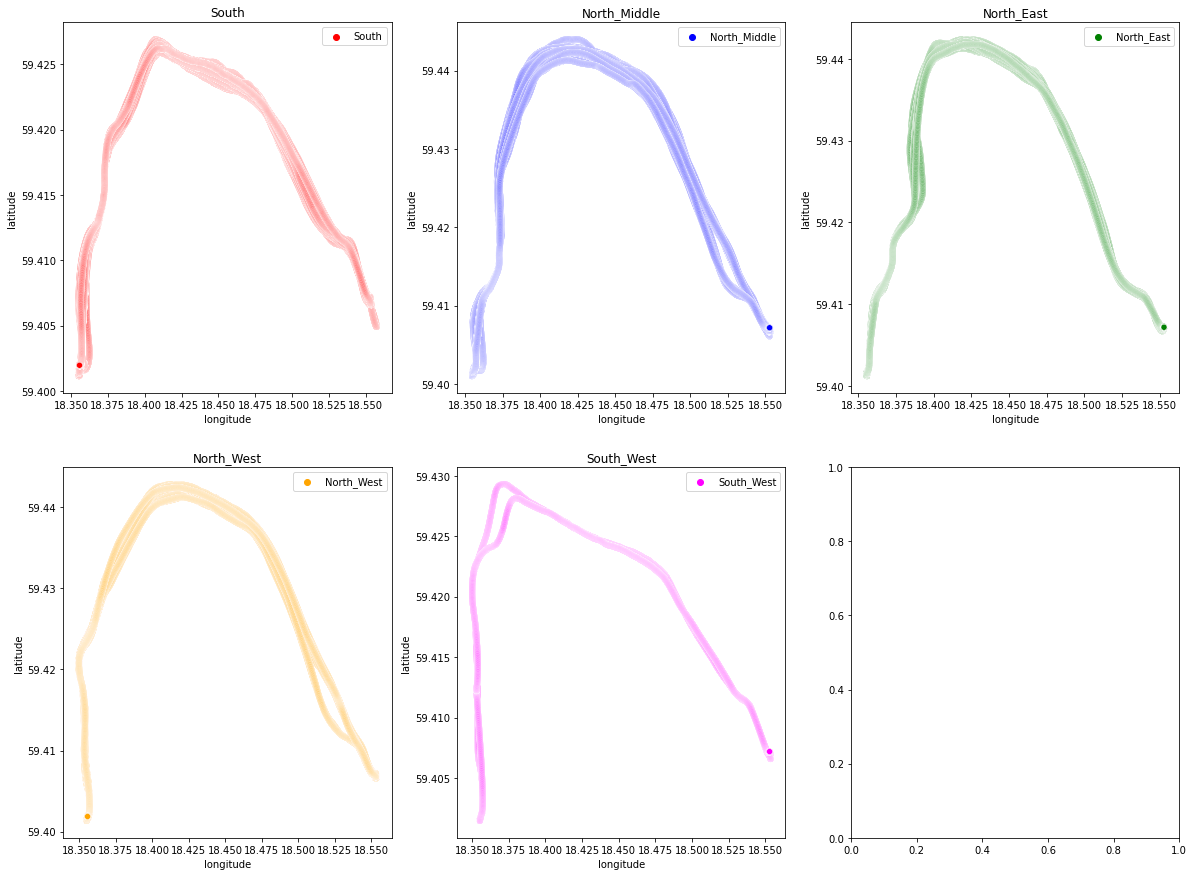

In [54]:
# Visualize the actual paths

from IPython.display import display

display(fig_scatter_actual_paths)


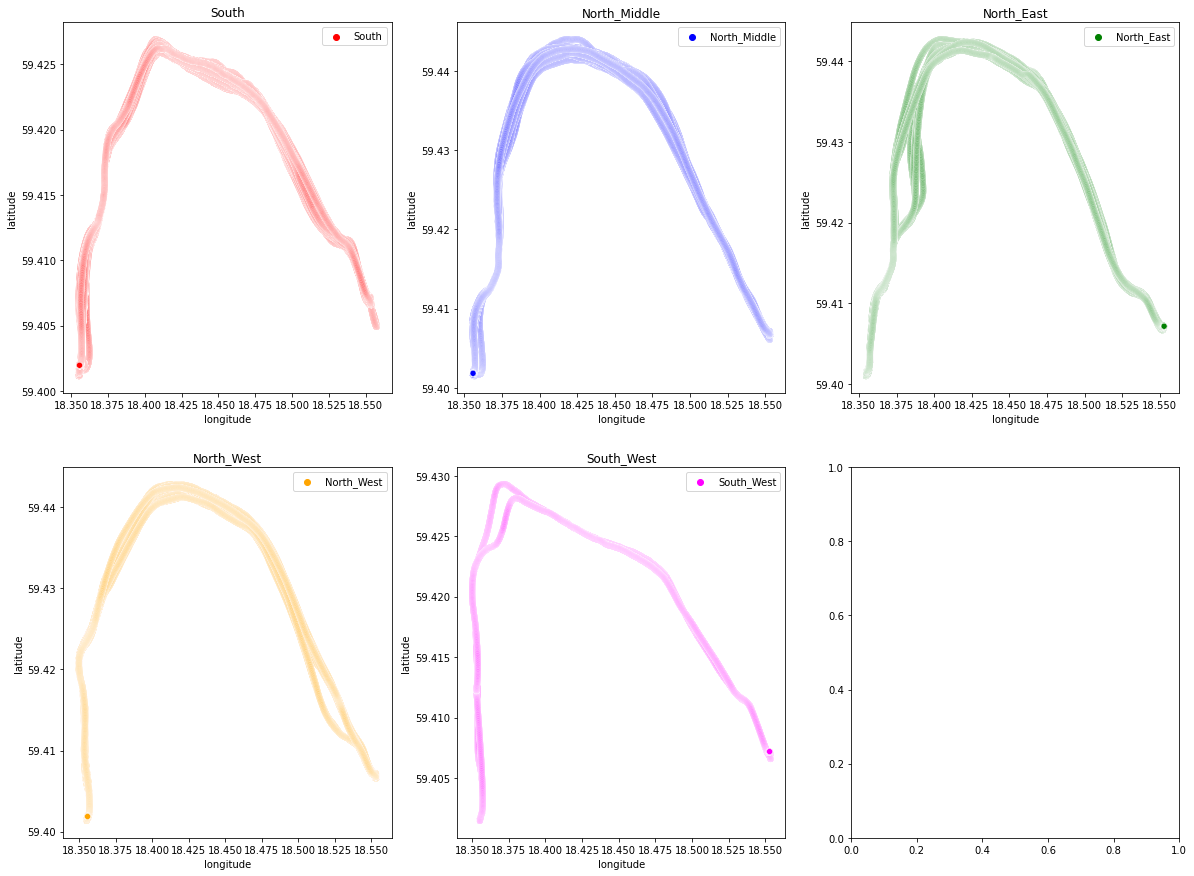

In [55]:
import seaborn as sns

# Visualize the predcited paths
import matplotlib.ticker as ticker
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))
sns.scatterplot(x='longitude', y='latitude', hue='direction', data=dforig2_result[dforig2_result['direction']=='South'], ax=axes[0,0],  palette=['red'])
sns.scatterplot(x='longitude', y='latitude', hue='direction', data=dforig2_result[dforig2_result['direction']=='North_Middle'], ax=axes[0,1],  palette=['blue'])
sns.scatterplot(x='longitude', y='latitude', hue='direction', data=dforig2_result[dforig2_result['direction']=='North_East'], ax=axes[0,2],  palette=['green'])
sns.scatterplot(x='longitude', y='latitude', hue='direction', data=dforig2_result[dforig2_result['direction']=='North_West'], ax=axes[1,0],  palette=['orange'])
sns.scatterplot(x='longitude', y='latitude', hue='direction', data=dforig2_result[dforig2_result['direction']=='South_West'], ax=axes[1,1],  palette=['magenta'])

# # Set number format for axis ticks
# for ax in axes:
#     ax.ticklabel_format(useOffset=False, style='plain')


axes[0,0].set_title('South')
axes[0,1].set_title('North_Middle')
axes[0,2].set_title('North_East')
axes[1,0].set_title('North_West')
axes[1,1].set_title('South_West')

axes[0,0].legend(title='')
axes[0,1].legend(title='')
axes[0,2].legend(title='')
axes[1,0].legend(title='')
axes[1,1].legend(title='')


plt.savefig(Output_folder+'/ScatterPlot_pred_Kmean_restult_paths.png')  

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


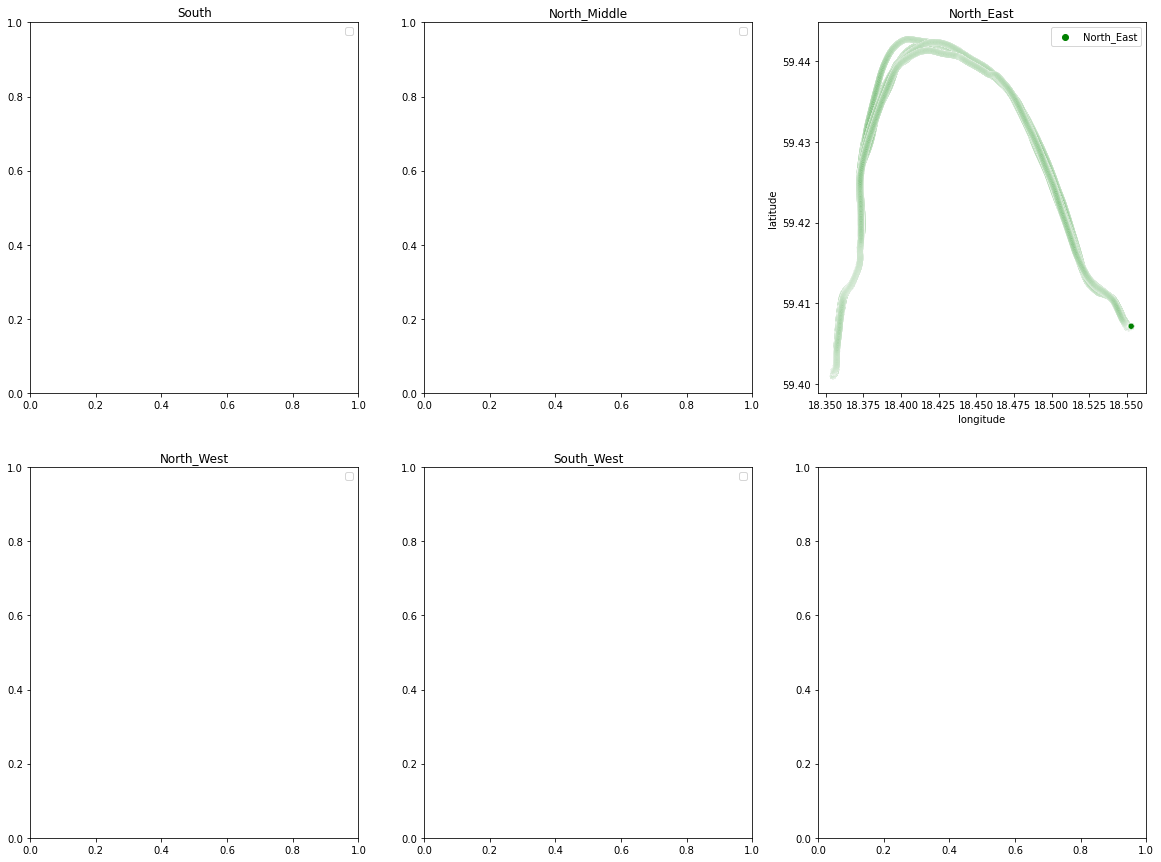

In [56]:
misclusters=dforig2_result[dforig2_result.RT_id.isin(misclus_rts.index.tolist())]
import seaborn as sns

# Visualize the misclustered paths
import matplotlib.ticker as ticker
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))
sns.scatterplot(x='longitude', y='latitude', hue='direction', data=misclusters[misclusters['direction']=='South'], ax=axes[0,0],  palette=['red'])
sns.scatterplot(x='longitude', y='latitude', hue='direction', data=misclusters[misclusters['direction']=='North_Middle'], ax=axes[0,1],  palette=['blue'])
sns.scatterplot(x='longitude', y='latitude', hue='direction', data=misclusters[misclusters['direction']=='North_East'], ax=axes[0,2],  palette=['green'])
sns.scatterplot(x='longitude', y='latitude', hue='direction', data=misclusters[misclusters['direction']=='North_West'], ax=axes[1,0],  palette=['orange'])
sns.scatterplot(x='longitude', y='latitude', hue='direction', data=misclusters[misclusters['direction']=='South_West'], ax=axes[1,1],  palette=['magenta'])

# # Set number format for axis ticks
# for ax in axes:
#     ax.ticklabel_format(useOffset=False, style='plain')


axes[0,0].set_title('South')
axes[0,1].set_title('North_Middle')
axes[0,2].set_title('North_East')
axes[1,0].set_title('North_West')
axes[1,1].set_title('South_West')

axes[0,0].legend(title='')
axes[0,1].legend(title='')
axes[0,2].legend(title='')
axes[1,0].legend(title='')
axes[1,1].legend(title='')
plt.savefig(Output_folder+'/Scatter_Plots_pred_miscluster_kmean_restult_paths.png')  

plt.show()

####  Plot PDF for Mis-Clustered Routes form K-means

In [57]:
df_misclus=dforig2[dforig2.RT_id.isin(misclus_rts.index.tolist())]
df_corct_clus=dforig2[~dforig2.RT_id.isin(misclus_rts.index.tolist())]

print(df_misclus.shape)
print(df_misclus.direction.unique())
df_misclus[['RT_id', 'latitude', 'longitude', 'direction']]

(11407, 73)
['North_Middle']


,RT_id,latitude,longitude,direction
date,,,,
2022-07-11 13:51:13,27.0,59.401609,18.354971,North_Middle
2022-07-11 13:51:14,27.0,59.401603,18.354966,North_Middle
2022-07-11 13:51:15,27.0,59.401594,18.354958,North_Middle
2022-07-11 13:51:16,27.0,59.401583,18.354948,North_Middle
2022-07-11 13:51:17,27.0,59.401574,18.354938,North_Middle
...,...,...,...,...
2022-09-18 09:21:02,107.0,59.407180,18.552930,North_Middle
2022-09-18 09:21:03,107.0,59.407180,18.552929,North_Middle
2022-09-18 09:21:04,107.0,59.407180,18.552927,North_Middle


              latitude  longitude
direction                        
North_Middle  59.42207  18.428172
              latitude  longitude
direction                        
North_Middle  0.013002   0.066504


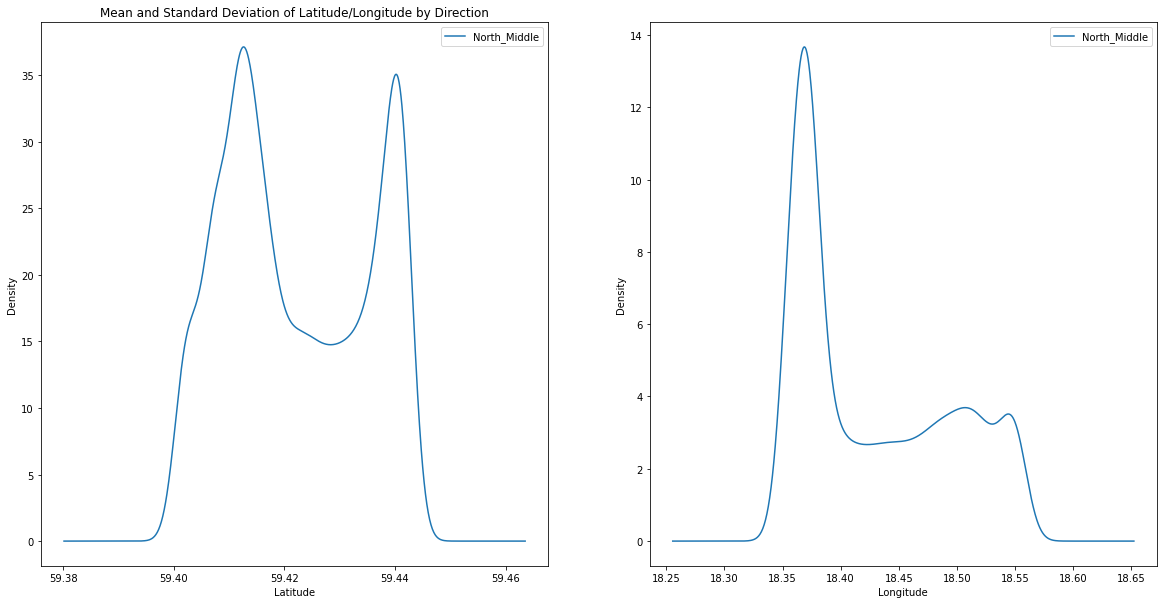

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# group the data by the 'direction' column and calculate the mean and standard deviation for the 'latitude' and 'longitude' columns
df_means = df_misclus.groupby('direction').agg({'latitude': 'mean', 'longitude': 'mean'})
df_stds = df_misclus.groupby('direction').agg({'latitude': 'std', 'longitude': 'std'})

print(df_means)
print(df_stds)

# create subplots for the means and standard deviations
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

# plot the means and standard deviations
# df_means.plot(kind='bar', ax=ax1, yerr=df_stds, capsize=3)
ax1.set_ylabel('Mean Latitude/Longitude')
ax1.set_title('Mean and Standard Deviation of Latitude/Longitude by Direction')

# plot the probability density function (PDF) for each latitude and longitude column
for col, ax in zip(['latitude', 'longitude'], [ax1, ax2]):
    for direction in df_misclus['direction'].unique():
        data = df_misclus.loc[df_misclus['direction'] == direction, col]
        data.plot(kind='density', ax=ax, label=direction)
    ax.legend()
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel('Density')

fig.savefig(Output_folder+'/Plot_misclustering_kmean_pdfs.png', dpi=500)  
plt.show()

               latitude  longitude
direction                         
North_East    59.421952  18.429992
North_Middle  59.422821  18.426074
North_West    59.423574  18.421449
South         59.416949  18.434915
South_West    59.418700  18.425664
              latitude  longitude
direction                        
North_East    0.012986   0.065567
North_Middle  0.013341   0.066296
North_West    0.012728   0.070329
South         0.007223   0.063148
South_West    0.007554   0.066970


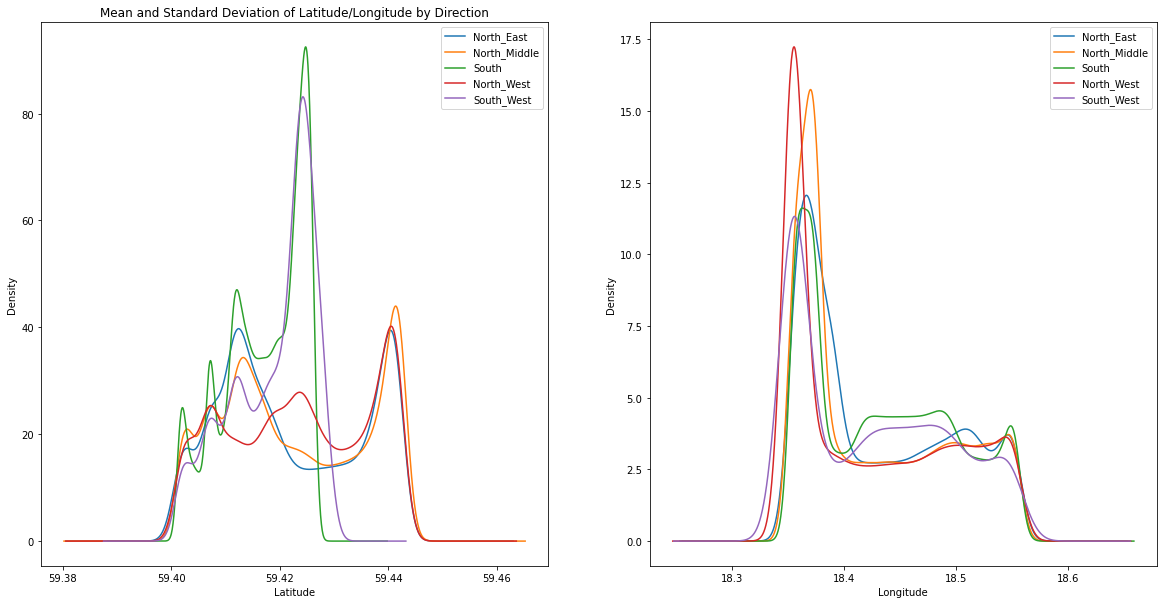

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# group the data by the 'direction' column and calculate the mean and standard deviation for the 'latitude' and 'longitude' columns
df_corrct_means = df_corct_clus.groupby('direction').agg({'latitude': 'mean', 'longitude': 'mean'})
df_corrct_std = df_corct_clus.groupby('direction').agg({'latitude': 'std', 'longitude': 'std'})

print(df_corrct_means)
print(df_corrct_std)

# create subplots for the means and standard deviations
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

# plot the means and standard deviations
# df_corrct_means.plot(kind='bar', ax=ax1, yerr=df_corrct_std, capsize=3)
ax1.set_ylabel('Mean Latitude/Longitude')
ax1.set_title('Mean and Standard Deviation of Latitude/Longitude by Direction')

# plot the probability density function (PDF) for each latitude and longitude column
for col, ax in zip(['latitude', 'longitude'], [ax1, ax2]):
    for direction in df_corct_clus['direction'].unique():
        data = df_corct_clus.loc[df_corct_clus['direction'] == direction, col]
        data.plot(kind='density', ax=ax, label=direction)
    ax.legend()
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel('Density')
    
fig.savefig(Output_folder+'/Plot_correct_clustering_kmean_pdfs.png', dpi=500)  
plt.show()

In [60]:
# st=stop

### GMM with distance matrix

In [61]:
from sklearn.mixture import GaussianMixture

# Create a dictionary to map cluster labels to path class labels

if rts_list_fg==0:
    cluster_label_map = {
        0: 'North_West',
        1: 'South',
        2: 'North_East',
        3: 'North_Middle',
        4: 'South_West'}


if rts_list_fg==2:
    cluster_label_map = {
        0: 'North_Middle',
        1: 'South',
        2: 'North_West',
        3: 'North_East',
        4: 'South_West'}

    
# Cluster the path classes in train_df based on their distances
# Initialize GMM with 3 clusters
gmm = GaussianMixture(n_components=5)

# Fit the model on the data
gmm.fit(distances)

gmm_labels= gmm.predict(distances)

gmm_labels

# Apply the mapping to the cluster labels
gmm_class_labels = [cluster_label_map[label] for label in gmm_labels]


# gmm_class_labels


In [62]:
y_pred_gmm=np.array(gmm_class_labels)
y_test_gmm=df_class_disp.values
print({class_name: count for class_name, count in zip(*np.unique(y_test_gmm, return_counts=True))})
print({class_name: count for class_name, count in zip(*np.unique(y_pred_gmm, return_counts=True))})

{'North_East': 14, 'North_Middle': 40, 'North_West': 16, 'South': 52, 'South_West': 2}
{'North_East': 20, 'North_Middle': 34, 'North_West': 16, 'South': 52, 'South_West': 2}


In [63]:
from sklearn.metrics import confusion_matrix
conf_mat_gmm = confusion_matrix(y_test_gmm, y_pred_gmm)
# print(f'Confusion matrix:\n{conf_mat_gmm}')


df_conf_mat_gmm = pd.DataFrame(conf_mat, index=['North_East', 'North_Middle', 'North_West',
                                            'South', 'South_West'], ##Actual paths
                           columns=['North_East', 'North_Middle', 'North_West',
                                            'South', 'South_West']) ##Predicted paths
df_conf_mat_gmm


,North_East,North_Middle,North_West,South,South_West
North_East,14,0,0,0,0
North_Middle,6,34,0,0,0
North_West,0,0,16,0,0
South,0,0,0,52,0
South_West,0,0,0,0,2


In [64]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

print(classification_report(y_test_gmm, y_pred_gmm))


              precision    recall  f1-score   support

  North_East       0.70      1.00      0.82        14
North_Middle       1.00      0.85      0.92        40
  North_West       1.00      1.00      1.00        16
       South       1.00      1.00      1.00        52
  South_West       1.00      1.00      1.00         2

    accuracy                           0.95       124
   macro avg       0.94      0.97      0.95       124
weighted avg       0.97      0.95      0.95       124



In [65]:
report = classification_report(y_test_gmm, y_pred_gmm, output_dict=True)

df_report = pd.DataFrame.from_dict(report).transpose().round(3)
df_report

,precision,recall,f1-score,support
North_East,0.700,1.000,0.824,14.000
North_Middle,1.000,0.850,0.919,40.000
North_West,1.000,1.000,1.000,16.000
South,1.000,1.000,1.000,52.000
South_West,1.000,1.000,1.000,2.000
accuracy,0.952,0.952,0.952,0.952
macro avg,0.940,0.970,0.948,124.000
weighted avg,0.966,0.952,0.954,124.000


In [66]:
np.unique(labels)

array(['North_East', 'North_Middle', 'North_West', 'South', 'South_West'],
      dtype='<U12')

In [67]:
y_pred_gmm
y_test_gmm
# Find the indices of mismatched entries
mismatch_gmm_indices = np.where(y_pred_gmm != y_test_gmm)[0]

# Print the indices of mismatched entries
print(mismatch_gmm_indices.shape)
print("Indices of mismatched entries:")
print(mismatch_gmm_indices)

(6,)
Indices of mismatched entries:
[ 27  33  40  81 100 107]


In [68]:
misclus_gmm_rts=df_class_disp.iloc[mismatch_gmm_indices.tolist()]
misclus_gmm_rts

RT_id
27.0     North_Middle
33.0     North_Middle
40.0     North_Middle
81.0     North_Middle
100.0    North_Middle
107.0    North_Middle
Name: direction, dtype: object

In [69]:
misclus_gmm_rts.index

Float64Index([27.0, 33.0, 40.0, 81.0, 100.0, 107.0], dtype='float64', name='RT_id')

In [70]:
# st=stop

### Plot clustering results from GMM

In [71]:
dforig.shape

(243688, 73)

In [72]:
from collections import Counter
print(len(rts_list))
print(y_test_gmm.shape)
print(y_pred_gmm.shape)
print(Counter(y_test_gmm))
print(Counter(y_pred_gmm))

124
(124,)
(124,)
Counter({'South': 52, 'North_Middle': 40, 'North_West': 16, 'North_East': 14, 'South_West': 2})
Counter({'South': 52, 'North_Middle': 34, 'North_East': 20, 'North_West': 16, 'South_West': 2})


In [73]:
# dforig2[['RT_id', 'direction', 'latitude', 'longitude']]

In [74]:
# Create a new DataFrame dforig2_result with the same structure as dforig2
dforig2_result_gmm = dforig2[['RT_id', 'latitude', 'longitude']].copy()

# Assign the cluster assignments to the 'direction' column of dforig2_result
for i, rt_id in enumerate(rts_list):
    idx = dforig2['RT_id'] == rt_id
    dforig2_result_gmm.loc[idx, 'direction'] = y_pred[i]

# Convert the 'direction' column to integer type
dforig2_result_gmm['direction'] = dforig2_result_gmm['direction']

# Verify the result
dforig2_result_gmm

,RT_id,latitude,longitude,direction
date,,,,
2022-07-01 08:54:52,0.0,59.401617,18.355397,North_East
2022-07-01 08:54:53,0.0,59.401609,18.355403,North_East
2022-07-01 08:54:54,0.0,59.401597,18.355410,North_East
2022-07-01 08:54:55,0.0,59.401582,18.355416,North_East
2022-07-01 08:54:56,0.0,59.401569,18.355422,North_East
...,...,...,...,...
2022-11-06 15:22:27,123.0,59.401974,18.355802,South
2022-11-06 15:22:28,123.0,59.401974,18.355803,South
2022-11-06 15:22:29,123.0,59.401973,18.355803,South


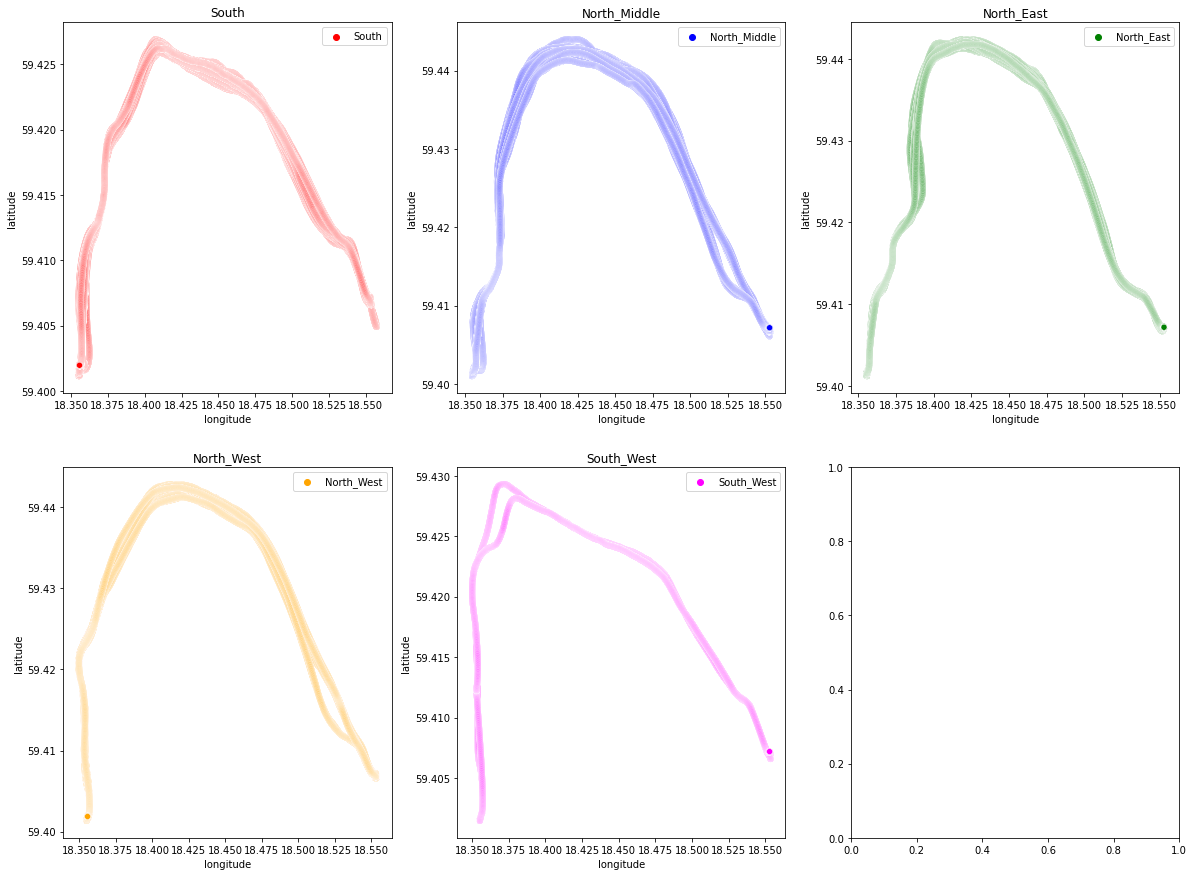

In [75]:
# Visualize the actual paths

from IPython.display import display

display(fig_scatter_actual_paths)


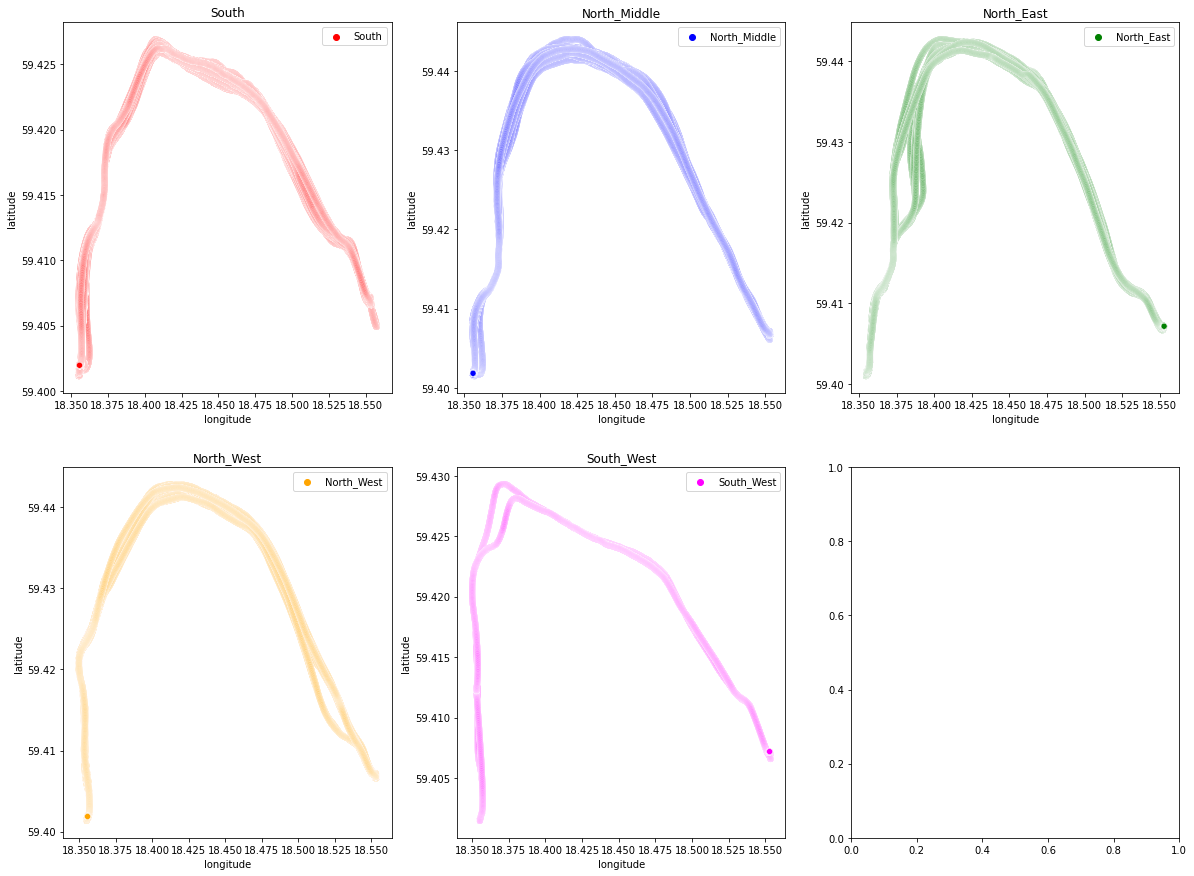

In [76]:
import seaborn as sns

# Visualize the predicted paths
import matplotlib.ticker as ticker
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))
sns.scatterplot(x='longitude', y='latitude', hue='direction', data=dforig2_result_gmm[dforig2_result_gmm['direction']=='South'], ax=axes[0,0],  palette=['red'])
sns.scatterplot(x='longitude', y='latitude', hue='direction', data=dforig2_result_gmm[dforig2_result_gmm['direction']=='North_Middle'], ax=axes[0,1],  palette=['blue'])
sns.scatterplot(x='longitude', y='latitude', hue='direction', data=dforig2_result_gmm[dforig2_result_gmm['direction']=='North_East'], ax=axes[0,2],  palette=['green'])
sns.scatterplot(x='longitude', y='latitude', hue='direction', data=dforig2_result_gmm[dforig2_result_gmm['direction']=='North_West'], ax=axes[1,0],  palette=['orange'])
sns.scatterplot(x='longitude', y='latitude', hue='direction', data=dforig2_result_gmm[dforig2_result_gmm['direction']=='South_West'], ax=axes[1,1],  palette=['magenta'])

# # Set number format for axis ticks
# for ax in axes:
#     ax.ticklabel_format(useOffset=False, style='plain')


axes[0,0].set_title('South')
axes[0,1].set_title('North_Middle')
axes[0,2].set_title('North_East')
axes[1,0].set_title('North_West')
axes[1,1].set_title('South_West')

axes[0,0].legend(title='')
axes[0,1].legend(title='')
axes[0,2].legend(title='')
axes[1,0].legend(title='')
axes[1,1].legend(title='')


plt.savefig(Output_folder+'/ScatterPlot_pred_restult_gmm_paths.png')  

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


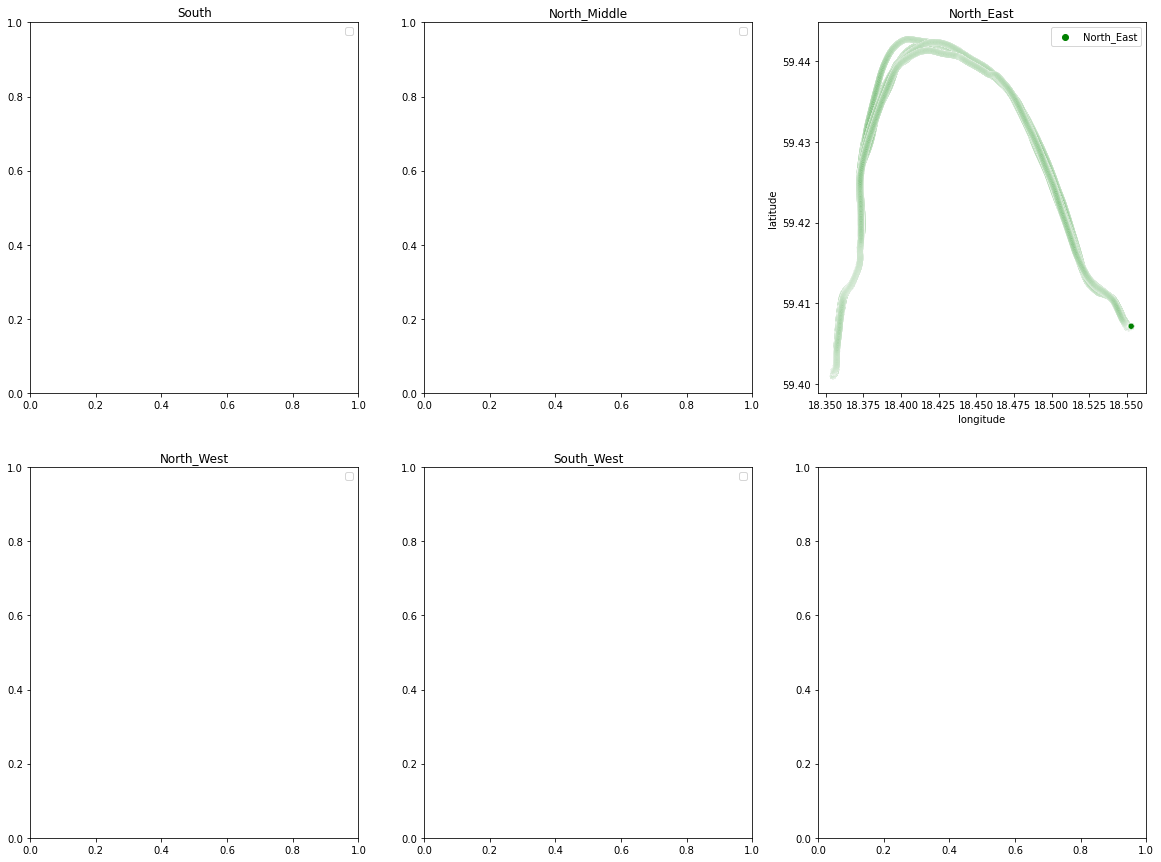

In [77]:
misclusters_gmm=dforig2_result_gmm[dforig2_result_gmm.RT_id.isin(misclus_gmm_rts.index.tolist())]

import seaborn as sns

# Visualize the misclustered paths
import matplotlib.ticker as ticker
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))
sns.scatterplot(x='longitude', y='latitude', hue='direction', data=misclusters_gmm[misclusters_gmm['direction']=='South'], ax=axes[0,0],  palette=['red'])
sns.scatterplot(x='longitude', y='latitude', hue='direction', data=misclusters_gmm[misclusters_gmm['direction']=='North_Middle'], ax=axes[0,1],  palette=['blue'])
sns.scatterplot(x='longitude', y='latitude', hue='direction', data=misclusters_gmm[misclusters_gmm['direction']=='North_East'], ax=axes[0,2],  palette=['green'])
sns.scatterplot(x='longitude', y='latitude', hue='direction', data=misclusters_gmm[misclusters_gmm['direction']=='North_West'], ax=axes[1,0],  palette=['orange'])
sns.scatterplot(x='longitude', y='latitude', hue='direction', data=misclusters_gmm[misclusters_gmm['direction']=='South_West'], ax=axes[1,1],  palette=['magenta'])

# # Set number format for axis ticks
# for ax in axes:
#     ax.ticklabel_format(useOffset=False, style='plain')


axes[0,0].set_title('South')
axes[0,1].set_title('North_Middle')
axes[0,2].set_title('North_East')
axes[1,0].set_title('North_West')
axes[1,1].set_title('South_West')

axes[0,0].legend(title='')
axes[0,1].legend(title='')
axes[0,2].legend(title='')
axes[1,0].legend(title='')
axes[1,1].legend(title='')


plt.savefig(Output_folder+'/Scatter_Plots_pred_miscluster_restult_gmm_paths.png')  

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


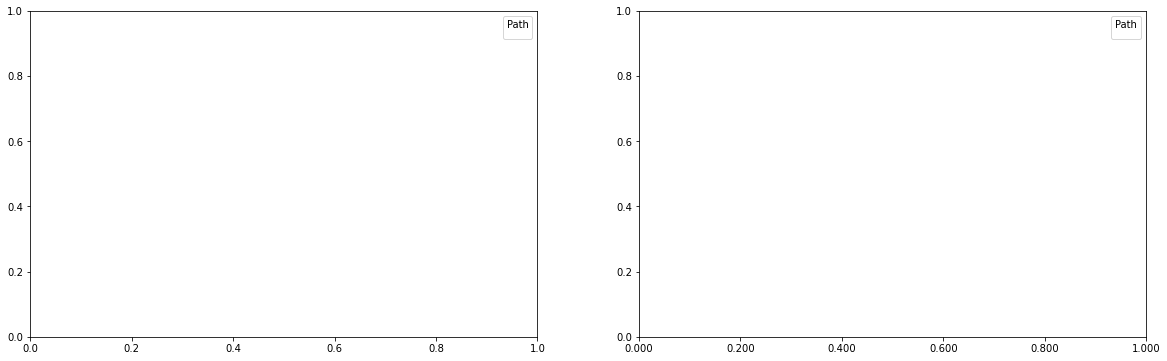

In [132]:
misclusters_gmm=dforig2_result_gmm[dforig2_result_gmm.RT_id.isin(misclus_gmm_rts.index.tolist())]
import seaborn as sns

# Visualize the distribution of latitude and longitude for both paths
import matplotlib.ticker as ticker
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.scatterplot(x='longitude', y='latitude', hue='direction', data=misclusters_gmm[misclusters_gmm['direction']=='North_Middle_Lower'], ax=axes[0],  palette=['blue'])
sns.scatterplot(x='longitude', y='latitude', hue='direction', data=misclusters_gmm[misclusters_gmm['direction']=='North_East_Lower'], ax=axes[0],  palette=['green'])

sns.scatterplot(x='longitude', y='latitude', hue='direction', data=dforig2[dforig2['direction']=='North_Middle_Lower'], ax=axes[1],  palette=['blue'])
sns.scatterplot(x='longitude', y='latitude', hue='direction', data=dforig2[dforig2['direction']=='North_East_Lower'], ax=axes[1],  palette=['green'])


# Set legend titles
axes[0].legend(title='Path')
axes[1].legend(title='Path')
axes[1].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))

plt.savefig(Output_folder+'/Scatter_2Plots_miscluster_Correct_gmm_paths.png', dpi=500)  

plt.show()

In [133]:
print(misclusters_gmm.shape)
print(misclusters_gmm.direction.unique())

(11407, 4)
['North_East']


####  Plot PDF for Mis-Clustered Trips from GMM

In [134]:
ec_rt_list=list(dforig2[dforig2.direction=='North_East'].RT_id.unique())

len(ec_rt_list)

14

In [135]:
df_gmm_misclus=dforig2[dforig2.RT_id.isin(misclus_gmm_rts.index.tolist())]
df_gmm_corct_clus=dforig2[~dforig2.RT_id.isin(misclus_gmm_rts.index.tolist())]
df_ec_path=dforig2[dforig2.RT_id.isin(ec_rt_list)]
df_gmm_misclus_ec_path=pd.concat([df_gmm_misclus, df_ec_path], axis=0)

print(df_gmm_misclus.shape)
print(df_gmm_misclus.direction.unique())
print(df_ec_path.direction.unique())
print(df_gmm_misclus_ec_path.direction.unique())


df_gmm_misclus[['RT_id', 'latitude', 'longitude', 'direction']]

(11407, 73)
['North_Middle']
['North_East']
['North_Middle' 'North_East']


,RT_id,latitude,longitude,direction
date,,,,
2022-07-11 13:51:13,27.0,59.401609,18.354971,North_Middle
2022-07-11 13:51:14,27.0,59.401603,18.354966,North_Middle
2022-07-11 13:51:15,27.0,59.401594,18.354958,North_Middle
2022-07-11 13:51:16,27.0,59.401583,18.354948,North_Middle
2022-07-11 13:51:17,27.0,59.401574,18.354938,North_Middle
...,...,...,...,...
2022-09-18 09:21:02,107.0,59.407180,18.552930,North_Middle
2022-09-18 09:21:03,107.0,59.407180,18.552929,North_Middle
2022-09-18 09:21:04,107.0,59.407180,18.552927,North_Middle


               latitude  longitude
direction                         
North_East    59.421952  18.429992
North_Middle  59.422070  18.428172
              latitude  longitude
direction                        
North_East    0.012986   0.065567
North_Middle  0.013002   0.066504


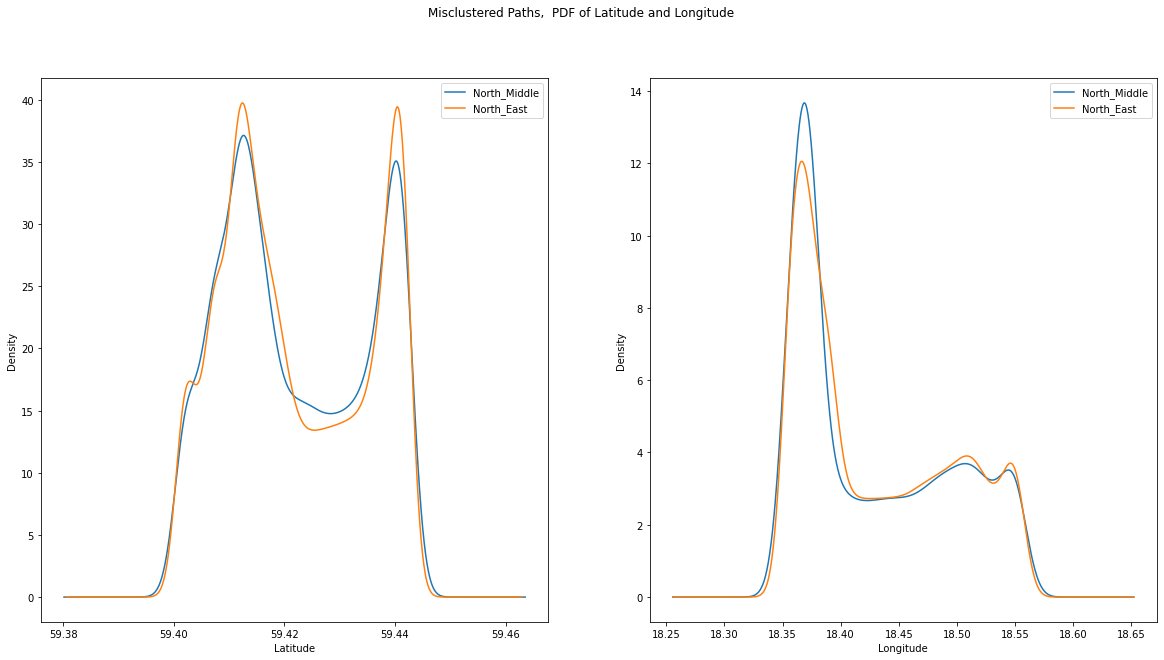

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# group the data by the 'direction' column and calculate the mean and standard deviation for the 'latitude' and 'longitude' columns
# df_gmm_means = df_gmm_misclus.groupby('direction').agg({'latitude': 'mean', 'longitude': 'mean'})
# df_gmm_stds = df_gmm_misclus.groupby('direction').agg({'latitude': 'std', 'longitude': 'std'})

df_gmm_means = df_gmm_misclus_ec_path.groupby('direction').agg({'latitude': 'mean', 'longitude': 'mean'})
df_gmm_stds = df_gmm_misclus_ec_path.groupby('direction').agg({'latitude': 'std', 'longitude': 'std'})


print(df_gmm_means)
print(df_gmm_stds)

# create subplots for the means and standard deviations
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

# plot the means and standard deviations
# df_means.plot(kind='bar', ax=ax1, yerr=df_stds, capsize=3)
ax1.set_ylabel('Mean Latitude/Longitude')

# plot the probability density function (PDF) for each latitude and longitude column
for col, ax in zip(['latitude', 'longitude'], [ax1, ax2]):
    for direction in df_gmm_misclus_ec_path['direction'].unique():
        data = df_gmm_misclus_ec_path.loc[df_gmm_misclus_ec_path['direction'] == direction, col]
        data.plot(kind='density', ax=ax, label=direction)
    ax.legend()
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel('Density')
    
plt.suptitle('Misclustered Paths,  PDF of Latitude and Longitude')

fig.savefig(Output_folder+'/Plot_misclustering_gmm_pdfs.png', dpi=500)  
plt.show()

               latitude  longitude
direction                         
North_East    59.421952  18.429992
North_Middle  59.422821  18.426074
North_West    59.423574  18.421449
South         59.416949  18.434915
South_West    59.418700  18.425664
              latitude  longitude
direction                        
North_East    0.012986   0.065567
North_Middle  0.013341   0.066296
North_West    0.012728   0.070329
South         0.007223   0.063148
South_West    0.007554   0.066970


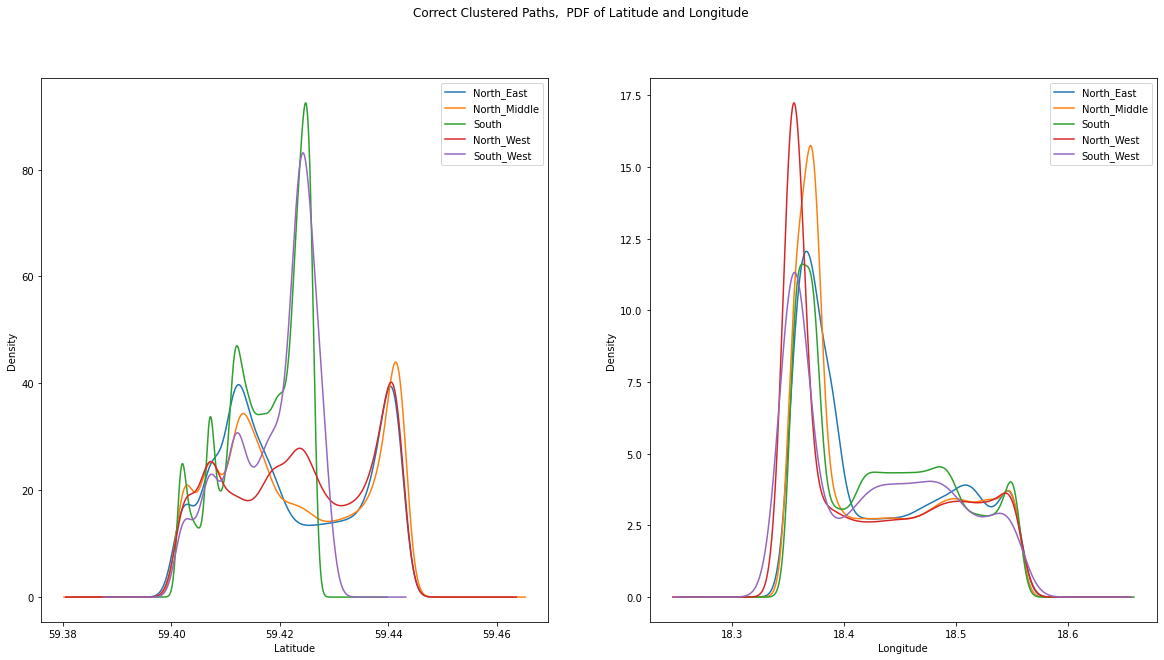

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# group the data by the 'direction' column and calculate the mean and standard deviation for the 'latitude' and 'longitude' columns
df_gmm_corrct_means = df_gmm_corct_clus.groupby('direction').agg({'latitude': 'mean', 'longitude': 'mean'})
df_gmm_corrct_std = df_gmm_corct_clus.groupby('direction').agg({'latitude': 'std', 'longitude': 'std'})

print(df_gmm_corrct_means)
print(df_gmm_corrct_std)

# create subplots for the means and standard deviations
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

# plot the means and standard deviations
# df_corrct_means.plot(kind='bar', ax=ax1, yerr=df_corrct_std, capsize=3)
ax1.set_ylabel('Mean Latitude/Longitude')

# plot the probability density function (PDF) for each latitude and longitude column
for col, ax in zip(['latitude', 'longitude'], [ax1, ax2]):
    for direction in df_gmm_corct_clus['direction'].unique():
        data = df_gmm_corct_clus.loc[df_gmm_corct_clus['direction'] == direction, col]
        data.plot(kind='density', ax=ax, label=direction)
    ax.legend()
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel('Density')
    
plt.suptitle('Correct Clustered Paths,  PDF of Latitude and Longitude')

fig.savefig(Output_folder+'/Plot_correct_clustering_gmm_pdfs.png', dpi=500)  
plt.show()

In [83]:
# st=stop

### Hierarchical clustering with distance matrix

[1 2 3 4 5]


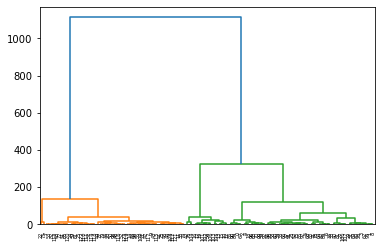

In [84]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

# Define the linkage method
# Z = linkage(distances, method='complete')
Z = linkage(distances, method='ward')


# Plot the dendrogram to visualize the clustering
dendrogram(Z)

## Divide the paths into three clusters
## Adjust this threshold based on the dendrogram plot

if rts_list_fg==0:
    max_dist =0.04 


if rts_list_fg==2: 
    max_dist = 100

    
clusters = fcluster(Z, t=max_dist, criterion='distance')

# print(clusters)
print(np.unique(clusters))

# Save the dendrogram plot to a file
# plt.savefig(Output_folder+'/Dendrogram_5paths.png', dpi=500)  
plt.show()

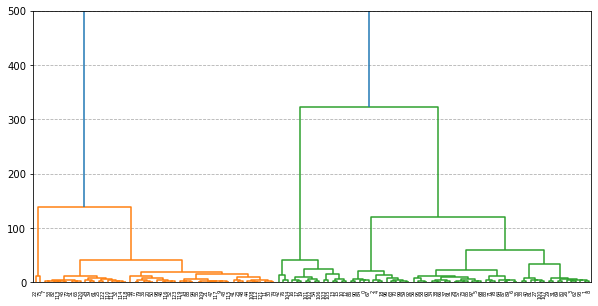

In [85]:
###To zoom in on the y-axis of the dendrogram plot,
fig, ax = plt.subplots(figsize=(10, 5))
dendrogram(Z, ax=ax)

# Set the y-axis limits
ax.set_ylim([0, 500])

ax.grid(axis='y', linestyle='--', zorder=0)

# Save the dendrogram plot to a file
plt.savefig(Output_folder+'/Dendrogram_5paths.png', dpi=500)  

plt.show()

In [86]:
Z

array([[4.50000000e+01, 7.20000000e+01, 6.74282535e-01, 2.00000000e+00],
       [4.60000000e+01, 1.16000000e+02, 9.45599025e-01, 2.00000000e+00],
       [7.70000000e+01, 7.90000000e+01, 9.85625667e-01, 2.00000000e+00],
       [1.14000000e+02, 1.18000000e+02, 1.01425643e+00, 2.00000000e+00],
       [4.70000000e+01, 1.17000000e+02, 1.04360487e+00, 2.00000000e+00],
       [3.80000000e+01, 6.60000000e+01, 1.06187857e+00, 2.00000000e+00],
       [2.10000000e+01, 1.28000000e+02, 1.14965423e+00, 3.00000000e+00],
       [1.12000000e+02, 1.21000000e+02, 1.17370070e+00, 2.00000000e+00],
       [4.30000000e+01, 1.15000000e+02, 1.25112812e+00, 2.00000000e+00],
       [8.80000000e+01, 9.40000000e+01, 1.29575416e+00, 2.00000000e+00],
       [8.70000000e+01, 8.90000000e+01, 1.29671119e+00, 2.00000000e+00],
       [2.80000000e+01, 5.70000000e+01, 1.34038180e+00, 2.00000000e+00],
       [5.90000000e+01, 9.20000000e+01, 1.37462585e+00, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.41523539e

In [87]:
cluster_map2 = {
    1: 'South_West',
    2: 'South',
    3: 'North_West',
    4: 'North_East',
    5: 'North_Middle'}


path_class_labels = [cluster_map2[label] for label in clusters]

y_pred_HC=np.array(path_class_labels)
y_test_HC=df_class_disp.values
{class_name: count for class_name, count in zip(*np.unique(y_test_HC, return_counts=True))}
{class_name: count for class_name, count in zip(*np.unique(y_pred_HC, return_counts=True))}

{'North_East': 14,
 'North_Middle': 40,
 'North_West': 16,
 'South': 52,
 'South_West': 2}

In [88]:
from sklearn.metrics import confusion_matrix
conf_mat_HC = confusion_matrix(y_test_HC, y_pred_HC)


df_conf_mat_HC = pd.DataFrame(conf_mat_HC, index=['North_East', 'North_Middle',
                                            'North_West', 'South', 'South_West'], ##Actual paths
                           columns=['North_East', 'North_Middle',
                                            'North_West', 'South', 'South_West']) ##Predicted paths
df_conf_mat_HC


,North_East,North_Middle,North_West,South,South_West
North_East,14,0,0,0,0
North_Middle,0,40,0,0,0
North_West,0,0,16,0,0
South,0,0,0,52,0
South_West,0,0,0,0,2


In [89]:
report = classification_report(y_test_HC, y_pred_HC, output_dict=True)

df_report = pd.DataFrame.from_dict(report).transpose().round(3)
df_report

,precision,recall,f1-score,support
North_East,1.0,1.0,1.0,14.0
North_Middle,1.0,1.0,1.0,40.0
North_West,1.0,1.0,1.0,16.0
South,1.0,1.0,1.0,52.0
South_West,1.0,1.0,1.0,2.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,124.0
weighted avg,1.0,1.0,1.0,124.0
